# Milestone 4 - Independent Project

## Author - Connor Higgins



# Abstract
## Problem
According the US Census Bureau, the population of King County has risen 13.3% in just the last seven years, from 1,931,249 in April 2010 to 2,188,649 in July 2017. Like other West Coast metropolitan areas, Greater Seattle is facing a growing housing crisis as a result of its rampant economic growth, among other contributing factors such as restrictive zoning laws. The pace of development simply cannot keep up with the demand, with prices exacerbated due to the influx of high-salaried tech workers.

Real estate development, like any venture, is driven by investors who believe they'll earn strong divdends on their investment. This belief necessitates a degree of certainty, something that can be achieved given enough data. With 21,613 entries, the <a href="https://www.kaggle.com/harlfoxem/housesalesprediction">King County House Sales Dataset</a>, obtained from user 'harlfoxem' on Kaggle, provides an excellent snapshot of the county housing market. 19 house features, selling price, and a reference id were obtained for each home in the dataset for both 2014 and 2015. Given this resource, our objectives are the following:
<ol>
    <li> Determine which of the given house features are the best predictors of the price target.</li><br>
    <li> Create a regression model that, using data from a larger training set, is able to accurately predict prices for houses within a smaller test set, where both sets are derived from the original dataset.</li><br>
</ol>


## Conclusion
As outlined below, the King County Housing dataset was cleaned and prepared for model fitting after an extensive exploration of the features, both original and engineered. This initial work provides much of the evidence for our first objective. As evidenced by Figure 2 & 3, geographic location is the most salient predictor of home price. Of the three primary location features, zipcode is the most effective at grouping homes by price, whereas latitude & longitude together provide a rougher estimate. 

Of the other geographic-based features, waterfront—whether the property borders a body of water—proved to be another excellent predictor: Figure 5 shows the price difference between waterfront and no-waterfront homes of the same grade (a measure of house structure and design); on average, being on the waterfront increased the value of the home by a multiple of 10. Other features which substantially increased model performance included living area (2014), grade, view (how many times a home was viewed while on the market), year last renovated, and the engineered feature living area difference, measuring any differences in house living area between 2014 and 2015. 

After the initial exploration of the dataset, an initial regression model was created using prominent features. Testing various combinations and interactions of features resulted in a model with a low AIC score (<i>AIC</i> = -8757) despite a strong coefficient of determination (<i>R<sup>2</sup></i> = 0.873) when fitted to the training portion of the dataset. When applied to a test portion of the dataset, comprised of 20% of all dataset entries (<i>n</i> = 4322), the model performed very well (Figure 8, Figure 9), contrary to concerns of overfitting (<i>R<sup>2</sup></i> = 0.875, <i>RMSE</i> = 0.435). Finally, regularization was applied in order to improve model performance, consisting in the testing a series of log-lambda and L1 weight values. The final model was a pure ridge regression (<i>L1_wt</i> = 0) with a log-lambda of -15.9. While regularization improved slightly upon the initial model (Figure 10), the difference was largely negligible (<i>R<sup>2</sup></i> = 0.875, <i>RMSE</i> = 0.435). 

## Preparing Dataset

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as statsmodels
import matplotlib.pyplot as plt
from PIL import Image
import requests
sns.set()

In [2]:
# Location of dataset
filename = r"https://raw.githubusercontent.com/connor1higgins/Projects/master/UWDataScience/PartII/kc_house_data.csv"

In [3]:
#df: DataFrame created from kc_house_data.csv
df = pd.read_csv(filename)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Converting and Engineering Features
### Determing Initial Correlations 

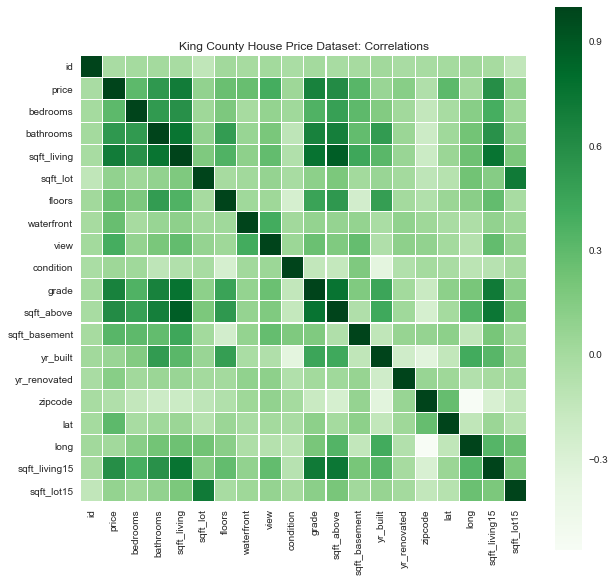

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [4]:
# Plotting initial correlations before transforming/converting features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, linewidths=.1, cmap="Greens")
plt.title('King County House Price Dataset: Correlations')
plt.show()
df.corr()

#### Figure 1 | Correlational Heatmap and Table for Numeric Features
An initial correlation of numeric features shows moderate correlation between price and house living area in 2014 (sqft_living, 0.702), housing grade (0.667), size above ground (sqft_above, 0.606), living area in 2015 (sqft_living15, 0.585), and total number of  bathrooms (0.525).

### Numerical Feature Conversion and Engineering

In [5]:
#numcols: numerical variables
numcols = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].copy()
numcols.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,1800,7503


In [6]:
# log_price: log transformation of price column
# A log transformation of price will reduce the skew towards expensive homes, providing better contrast between cheaper homes
numcols['log_price'] = np.log(numcols['price'])
numcols[['log_price', 'price']].describe() 

,log_price,price
count,21613.000000,2.161300e+04
mean,13.047817,5.400881e+05
std,0.526685,3.671272e+05
min,11.225243,7.500000e+04
25%,12.682152,3.219500e+05
50%,13.017003,4.500000e+05
75%,13.377006,6.450000e+05
max,15.856731,7.700000e+06


In [7]:
# sqft_living_log : log transformation of sqft_living column
# Like price, sqft_living likely follows a pareto distribtion, which can be linearized with a log transformation
numcols['sqft_living_log'] = np.log(numcols['sqft_living'])

# sqft_living_log15 : log transformation of sqft_living15 column
numcols['sqft_living15_log'] = np.log(numcols['sqft_living15'])

# sqft_living_diff_log: difference between sqft_living_log and sqft_living15_log features.
# Quantifies any recent expansions or reductions to house
numcols['sqft_living_diff_log'] = numcols['sqft_living15_log'] - numcols['sqft_living_log']

numcols[['sqft_living_log', 'sqft_living15_log', 'sqft_living_diff_log']].describe()

,sqft_living_log,sqft_living15_log,sqft_living_diff_log
count,21613.000000,21613.000000,21613.000000
mean,7.550335,7.539440,-0.010894
std,0.424807,0.327515,0.283042
min,5.669881,5.988961,-1.791759
25%,7.263330,7.306531,-0.149169
50%,7.554859,7.517521,0.000000
75%,7.843849,7.766417,0.126563
max,9.513404,8.733916,1.720301


In [8]:
# sqft_lot_log : log transformation of sqft_lot column
numcols['sqft_lot_log'] = np.log(numcols['sqft_lot'])

# sqft_lot_log15 : log transformation of sqft_lot15 column
numcols['sqft_lot15_log'] = np.log(numcols['sqft_lot15'])

### Categorical and Timeseries Feature Conversion and Engineering

In [9]:
#catcols: categorical and timeseries variables
catcols = df[['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']].copy()
catcols.head()

,id,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,7129300520,20141013T000000,0,0,3,7,1955,0,98178
1,6414100192,20141209T000000,0,0,3,7,1951,1991,98125
2,5631500400,20150225T000000,0,0,3,6,1933,0,98028
3,2487200875,20141209T000000,0,0,5,7,1965,0,98136
4,1954400510,20150218T000000,0,0,3,8,1987,0,98074


In [10]:
# converting 'date' column to datetimes data type
catcols['date'] = pd.to_datetime(catcols['date'], errors='coerce')

# replacing missing values in yr_renovated with yr_built values
# yr_renovated now denotes year built if house wasn't renovated, allowing it to stand-in for yr_built in the model.
norenovate = catcols.loc[: ,'yr_renovated'] == 0
catcols.loc[norenovate, 'yr_renovated'] = catcols.loc[norenovate, 'yr_built']
# converting 'yr_built' column to datetimes data type
catcols['yr_built'] = pd.to_datetime(catcols['yr_built'], errors='coerce', format='%Y')
# converting 'yr_renovated' column to datetimes data type
catcols['yr_renovated'] = pd.to_datetime(catcols['yr_renovated'], errors='coerce', format='%Y')

# converting other catcol columns to categorical data type
nondates = ['id', 'waterfront', 'view', 'condition', 'grade', 'zipcode']
catcols.loc[:, nondates] = catcols.loc[:, nondates].astype('category')
catcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
id              21613 non-null category
date            21613 non-null datetime64[ns]
waterfront      21613 non-null category
view            21613 non-null category
condition       21613 non-null category
grade           21613 non-null category
yr_built        21613 non-null datetime64[ns]
yr_renovated    21613 non-null datetime64[ns]
zipcode         21613 non-null category
dtypes: category(6), datetime64[ns](3)
memory usage: 1.4 MB


In [11]:
# recombining numcols and catcols DataFrames into df, an updated version of the original df DataFrame
df = pd.concat([numcols, catcols], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,sqft_lot15_log,id,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,1180,0,47.5112,-122.257,...,8.639411,7129300520,2014-10-13,0,0,3,7,1955-01-01,1955-01-01,98178
1,538000.0,3,2.25,2570,7242,2.0,2170,400,47.7210,-122.319,...,8.941022,6414100192,2014-12-09,0,0,3,7,1951-01-01,1991-01-01,98125
2,180000.0,2,1.00,770,10000,1.0,770,0,47.7379,-122.233,...,8.994917,5631500400,2015-02-25,0,0,3,6,1933-01-01,1933-01-01,98028
3,604000.0,4,3.00,1960,5000,1.0,1050,910,47.5208,-122.393,...,8.517193,2487200875,2014-12-09,0,0,5,7,1965-01-01,1965-01-01,98136
4,510000.0,3,2.00,1680,8080,1.0,1680,0,47.6168,-122.045,...,8.923058,1954400510,2015-02-18,0,0,3,8,1987-01-01,1987-01-01,98074


In [12]:
# removing 'hotel' house from dataset
# Apart from this one entry, the King County Housing Dataset requires little to no cleaning
nohotels = df.loc[:, 'bedrooms'] != 33
df = df.loc[nohotels, :] 

## Initial Data Exploration

### Latitude and Longitude v. Log-Price

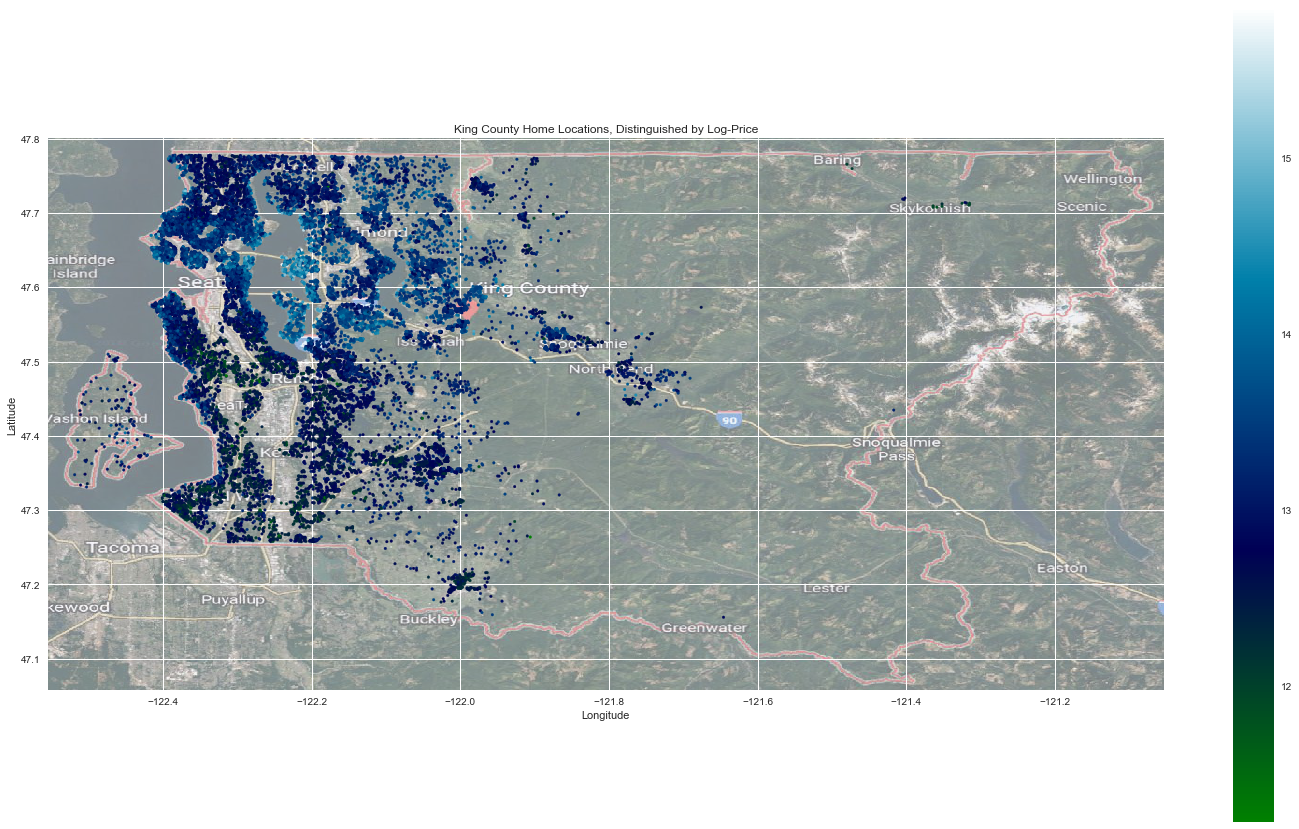

In [13]:
# plotting home location with hue based on log_price
plt.figure(figsize=(25, 15))

plt.scatter(x = df['long'], y = df['lat'], s = 7, c = df['log_price'], cmap = 'ocean')
plt.colorbar()

im = Image.open(requests.get("https://i.imgur.com/znVDbGG.jpg", stream=True).raw) # obtaining map of King County
im.putalpha(120) # applying alpha for readability
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
extent = xmin + 0.025, xmax + 0.2, ymin - 0.065, ymax - 0.01 # adjusting image size and position to match data contours
plt.imshow(im, extent=extent)

plt.title('King County Home Locations, Distinguished by Log-Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Figure 2 | King County Home Locations, Distinguished by a Heatmap of Log-Price
Locations and log-price for homes present in the King County housing dataset. Longitude and latitude features were plotted against one another, with a Google image of King County fitted and underlayed. Log-price is shown as a heatmap with the Matplotlib 'ocean' color-palette, allowing us to better see differences between middle (dark blue) and low (green) price regions, such as South Seattle and West Renton, as well as upper-middle (blue) and upper price (light-blue and white) regions, such as Redmond and Medina. Overall, there appears to be a considerable north and south divide as well as a waterfront and inland divide for high and low-priced homes respectively.

### Zipcode v. Price

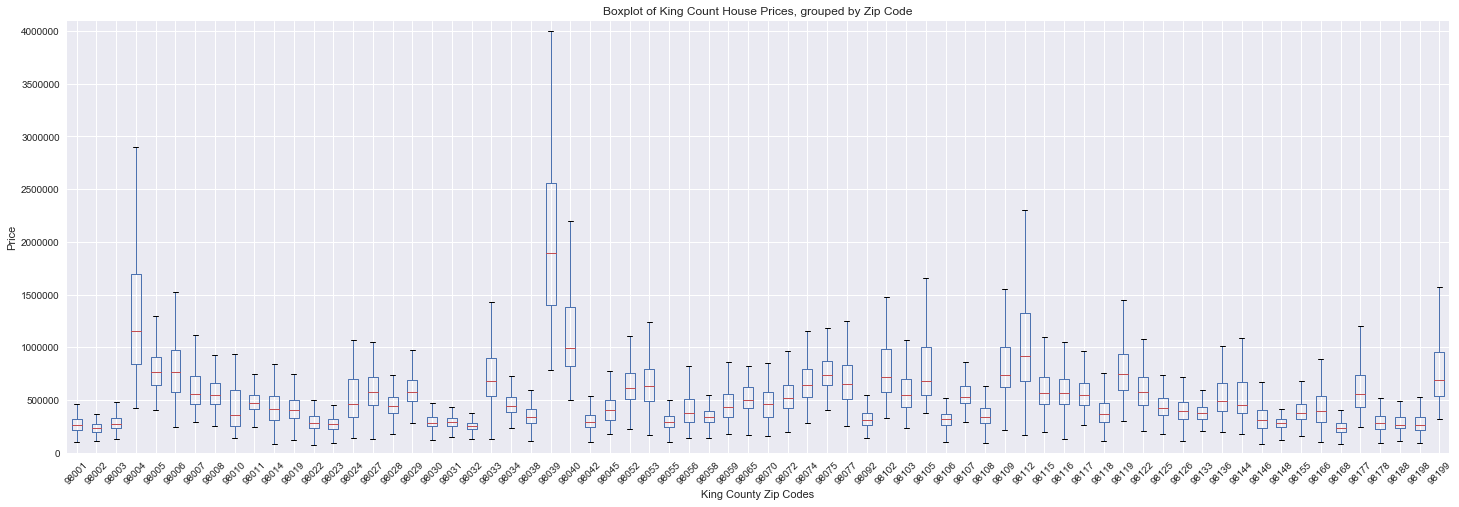

zipcode              98001          98002          98003         98004  \
price count     362.000000     199.000000     280.000000  3.170000e+02   
      mean   280804.690608  234284.035176  294111.278571  1.355927e+06   
      std     98979.230092   52041.448659  107597.662236  7.458201e+05   
      min    100000.000000   95000.000000  128000.000000  4.250000e+05   
      25%    215000.000000  199975.000000  229000.000000  8.450000e+05   
      50%    260000.000000  235000.000000  267475.000000  1.150000e+06   
      75%    319375.000000  268500.000000  330000.000000  1.691000e+06   
      max    850000.000000  389000.000000  950000.000000  7.062500e+06   

zipcode             98005         98006         98007         98008  \
price count  1.680000e+02  4.980000e+02  1.410000e+02  2.830000e+02   
      mean   8.101649e+05  8.596848e+05  6.171051e+05  6.455074e+05   
      std    2.687537e+05  4.459116e+05  1.999402e+05  4.215900e+05   
      min    4.000000e+05  2.475000e+05  2.950000e+05  2.500000e+05   
      25%    6.377750e+05  5.756250e+05  4.650000e+05  4.653750e+05   
      50%    7.654750e+05  7.601845e+05  5.550000e+05  5.450000e+05   
      75%    9.112500e+05  9.772500e+05  7.300000e+05  6.585000e+05   
      max    1.960000e+06  4.208000e+06  1.315000e+06  3.567000e+06   

zipcode              98010         98011      ...              98146  \
price count     100.000000  1.950000e+02      ...       2.880000e+02   
      mean   423665.990000  4.903515e+05      ...       3.594832e+05   
      std    195414.982762  1.218467e+05      ...       2.141424e+05   
      min    135000.000000  2.455000e+05      ...       8.200000e+04   
      25%    256750.000000  4.124000e+05      ...       2.293750e+05   
      50%    359999.500000  4.700000e+05      ...       3.050000e+05   
      75%    592500.000000  5.500000e+05      ...       4.052125e+05   
      max    935000.000000  1.075000e+06      ...       1.410000e+06   

zipcode              98148         98155         98166          98168  \
price count      57.000000  4.460000e+02  2.540000e+02     269.000000   
      mean   284908.596491  4.237257e+05  4.642318e+05  240328.371747   
      std     89616.940152  2.682093e+05  2.964630e+05   69984.818758   
      min    105500.000000  1.530000e+05  1.000000e+05   78000.000000   
      25%    240000.000000  3.156250e+05  2.922500e+05  199950.000000   
      50%    278000.000000  3.750000e+05  3.900000e+05  235000.000000   
      75%    319990.000000  4.599875e+05  5.403750e+05  285000.000000   
      max    600600.000000  4.500000e+06  2.510000e+06  600000.000000   

zipcode             98177         98178          98188         98198  \
price count  2.550000e+02  2.620000e+02     136.000000  2.800000e+02   
      mean   6.761854e+05  3.106128e+05  289078.345588  3.028789e+05   
      std    4.358499e+05  1.610447e+05  103106.579944  1.547993e+05   
      min    2.455600e+05  9.000000e+04  110000.000000  9.500000e+04   
      25%    4.285000e+05  2.232500e+05  228750.000000  2.163750e+05   
      50%    5.540000e+05  2.782770e+05  264000.000000  2.650000e+05   
      75%    7.394750e+05  3.497925e+05  335000.000000  3.400000e+05   
      max    3.800000e+06  1.700000e+06  707000.000000  1.350000e+06   

zipcode             98199  
price count  3.170000e+02  
      mean   7.918208e+05  
      std    3.978682e+05  
      min    3.230000e+05  
      25%    5.350000e+05  
      50%    6.898000e+05  
      75%    9.500000e+05  
      max    3.200000e+06  

[8 rows x 70 columns]

In [14]:
# creating boxplot for house price per zipcode
fig = plt.figure(figsize=(24, 8))
ax = fig.gca()
df.loc[:,['price', 'zipcode']].boxplot(by = 'zipcode', ax = ax)
locs, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
ax.set_ylim(0.0, 4100000.0)
ax.set_title('Boxplot of King Count House Prices, grouped by Zip Code')
plt.suptitle("")
ax.set_xlabel('King County Zip Codes')
ax.set_ylabel('Price')
plt.show()

# creating complementary summary statistics table
df.loc[:,['price', 'zipcode']].groupby('zipcode').describe().T

#### Figure 3 | Boxplots of House Price grouped by Zipcode; Summary Statistics
As Figure 2 depicts a general link between location and house log-price, houses in the dataset were grouped by zipcode and then plotted against price. Unlike latitude and longitude, the zipcode feature accounts for city boundaries, which proves to be a better method for grouping houses by price: 98039 (Medina), 98004 (Bellevue), 98112 (Madison Park and Montlake), and 98040 (Mercer Island) all contain houses well above 1.5 million; of this set, only 98112 contains homes with prices less than 400 thousand. Conversely, poorer zipcodes such as 98001 through 98002 (Auburn and Federal Way), 98030 through 98032 (Kent), 98148 (Burien and Normandy Park), and 98168 (White Center and Tukwila) contain no homes above 500 thousand.

### Year Renovated v. Price

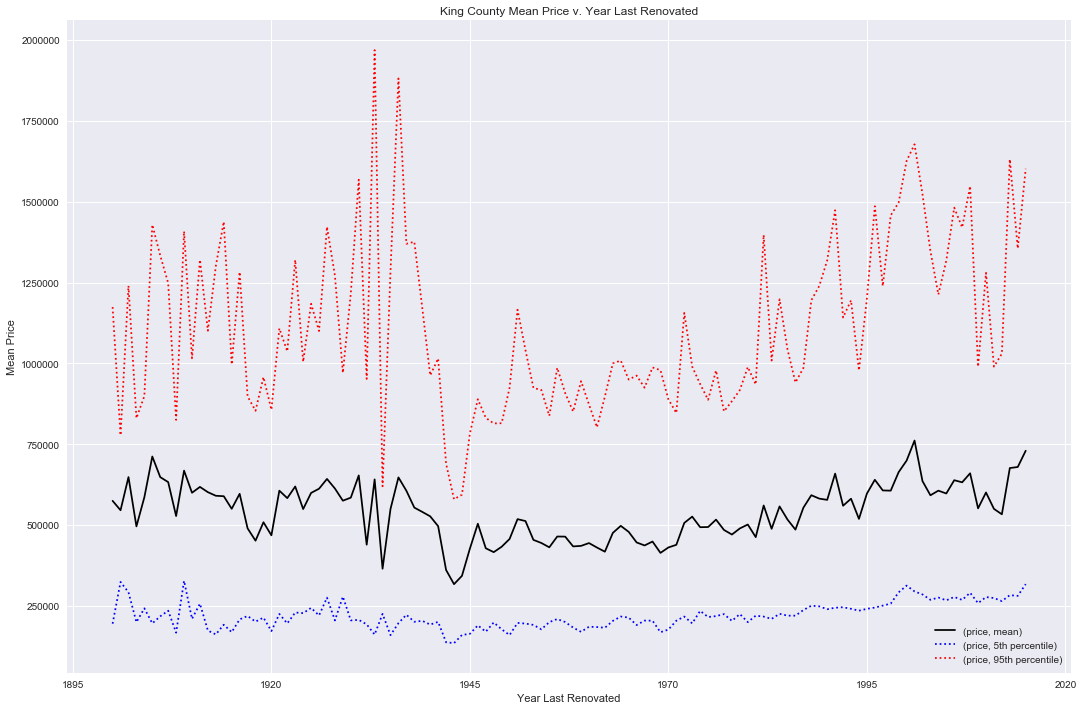

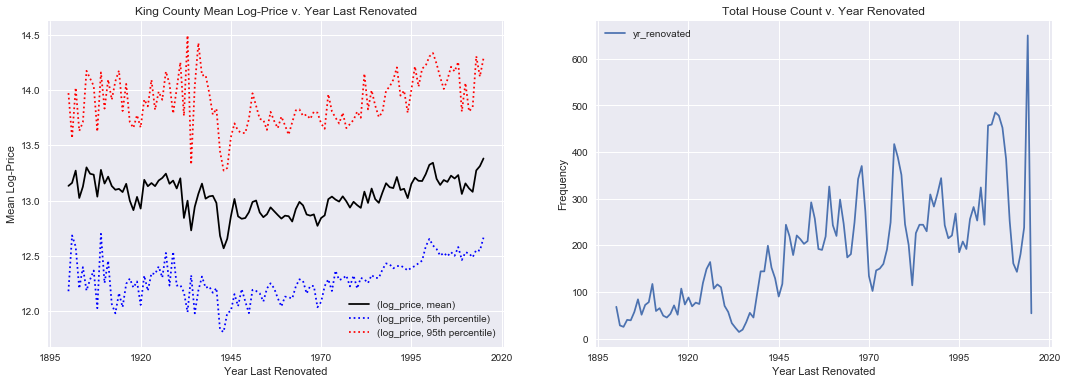

In [15]:
# defining agg function 'percentile'
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = f'{n}th percentile'
    return percentile_

# plotting mean price v. yr_renovated timeseries
fig = plt.figure(figsize=(18, 12))
ax = fig.gca()
df_renovated = df.loc[:, ['price', 'yr_renovated']].groupby('yr_renovated') # if no renovations, yr_renovated reflects yr_built
df_renovated = df_renovated.agg(['mean', percentile(5), percentile(95)]).plot(style=['k','b:','r:'], ax=ax)
plt.legend(loc='lower right')
plt.title('King County Mean Price v. Year Last Renovated')
plt.ylabel('Mean Price')
plt.xlabel('Year Last Renovated')
plt.show()

# plotting mean log_price v. yr_renovated...
fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(121)
df_renovated_log = df.loc[:, ['log_price', 'yr_renovated']].groupby('yr_renovated')
df_renovated_log = df_renovated_log.agg(['mean', percentile(5), percentile(95)]).plot(style=['k','b:','r:'], ax=ax1)
plt.legend(loc='lower right')
plt.title('King County Mean Log-Price v. Year Last Renovated')
plt.ylabel('Mean Log-Price')
plt.xlabel('Year Last Renovated')

# ...alongside total count of houses by yr_renovated
ax2 = plt.subplot(122)
df.loc[:, ['yr_renovated']].groupby(df['yr_renovated']).agg('count').plot(ax=ax2)
plt.title('Total House Count v. Year Renovated')
plt.ylabel('Frequency')
plt.xlabel('Year Last Renovated')
plt.show()

#### Figure 4 | Timeseries Plots of Price (top) and Log-Price (bottom-left) for Year Last Renovated, as well as house dataset count for Year Last Renovated (bottom-right)
As the 'yr_renovated' feature denotes either the year last renovated or the year built if a home hasn't been renovated, we can group homes by this feature to determine whether the age of a home affects its overall price. The timeseries log-Price v. year last renovated (bottom-left) shows a noticeable decrease in the mean price for homes between the years of 1940 and 1945, while price v. year last renovated (top) shows how pronounced these changes were for homes above the 95th percentile. 

The reason for these fluctuations is not immediately apparent, though we can see from the year last renovated frequency plot (bottom-right) that there are far fewer houses renovated or built during the period prior to this (coinciding with the Great Depression). The rapid increase in houses being built thereafter may suggest the use of cheaper and faster construction methods (such as the use of asbestos) that no longer meet housing and real estate guidelines, subsequently affecting pricing.

### Grade and Waterfront v. Price

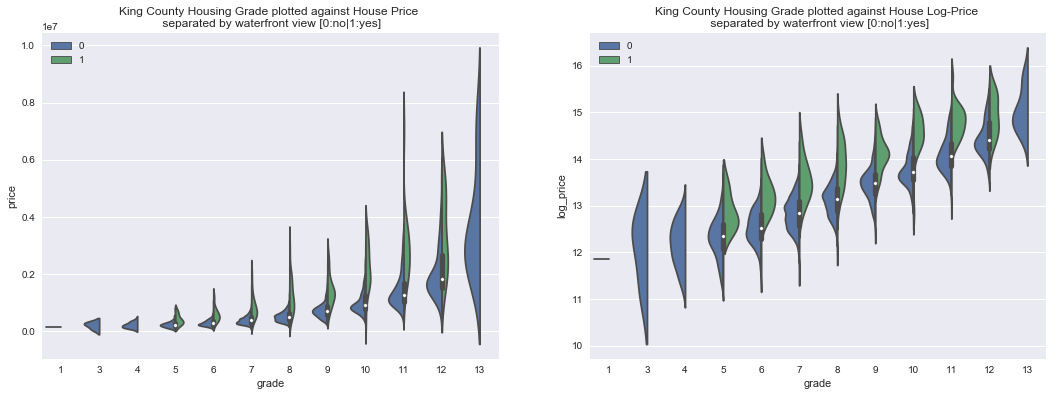

waterfront          0                                               \
grade              1              3              4              5    
price count       1.0       3.000000      29.000000     238.000000   
      mean   142000.0  205666.666667  214381.034483  245965.970588   
      std         NaN  113517.986827   94306.167816  115732.470243   
      min    142000.0   75000.000000   80000.000000   78000.000000   
      25%    142000.0  168500.000000  145000.000000  172375.000000   
      50%    142000.0  262000.000000  205000.000000  225000.000000   
      75%    142000.0  271000.000000  265000.000000  295000.000000   
      max    142000.0  280000.000000  435000.000000  795000.000000   

waterfront                                                           \
grade                  6             7             8             9    
price count  2.026000e+03  8.957000e+03  6.028000e+03  2.590000e+03   
      mean   3.002466e+05  4.014476e+05  5.382225e+05  7.672723e+05   
      std    1.200391e+05  1.531547e+05  2.046370e+05  3.071267e+05   
      min    8.200000e+04  9.000000e+04  1.400000e+05  2.300000e+05   
      25%    2.150000e+05  2.850000e+05  3.899800e+05  5.700000e+05   
      50%    2.750000e+05  3.750000e+05  5.100000e+05  7.190000e+05   
      75%    3.650000e+05  4.850000e+05  6.350000e+05  8.750000e+05   
      max    1.052000e+06  1.565000e+06  2.200000e+06  2.546000e+06   

waterfront                                                           \
grade                  10            11            12            13   
price count  1.106000e+03  3.790000e+02  7.900000e+01  1.300000e+01   
      mean   1.041524e+06  1.422826e+06  2.035135e+06  3.709615e+06   
      std    4.330428e+05  5.847795e+05  8.771135e+05  1.859450e+06   
      min    3.160000e+05  4.200000e+05  8.350000e+05  1.780000e+06   
      25%    7.650000e+05  1.017500e+06  1.488000e+06  2.415000e+06   
      50%    9.050000e+05  1.242000e+06  1.769000e+06  2.983000e+06   
      75%    1.234475e+06  1.650000e+06  2.265000e+06  3.800000e+06   
      max    3.000000e+06  3.418800e+06  5.350000e+06  7.700000e+06   

waterfront               1                                            \
grade                   5             6             7             8    
price count       4.000000  1.200000e+01  2.300000e+01  4.000000e+01   
      mean   400725.000000  5.843827e+05  8.372609e+05  1.240636e+06   
      std    175872.024969  2.450920e+05  4.103070e+05  6.189921e+05   
      min    285000.000000  3.400000e+05  3.570000e+05  4.250000e+05   
      25%    288750.000000  4.184440e+05  5.820000e+05  7.462500e+05   
      50%    329950.000000  5.290000e+05  7.000000e+05  1.087500e+06   
      75%    441925.000000  6.887500e+05  9.800000e+05  1.621250e+06   
      max    658000.000000  1.200000e+06  2.050000e+06  3.070000e+06   

waterfront                                                           
grade                  9             10            11            12  
price count  2.500000e+01  2.800000e+01  2.000000e+01  1.100000e+01  
      mean   1.420066e+06  2.266536e+06  2.899445e+06  3.312209e+06  
      std    5.187423e+05  7.868425e+05  1.196176e+06  1.351502e+06  
      min    7.050000e+05  3.800000e+05  1.612500e+06  1.637500e+06  
      25%    1.155000e+06  1.700000e+06  2.187500e+06  2.212500e+06  
      50%    1.339000e+06  2.115000e+06  2.650000e+06  3.120000e+06  
      75%    1.662000e+06  2.914750e+06  3.300000e+06  4.584000e+06  
      max    2.700000e+06  3.600000e+06  7.062500e+06  5.300000e+06

In [16]:
# plotting grade and waterfront features categories against house price(1) and log-price(2)
plt.figure(figsize=(18,6))
# price
ax1 = plt.subplot(121)
sns.violinplot(x='grade', y='price', data=df, hue='waterfront', split=True)
plt.title('King County Housing Grade plotted against House Price \n separated by waterfront view [0:no|1:yes]')
plt.legend(loc='upper left')
# log-price
ax1 = plt.subplot(122)
sns.violinplot(x='grade', y='log_price', data=df, hue='waterfront', split=True)
plt.title('King County Housing Grade plotted against House Log-Price \n separated by waterfront view [0:no|1:yes]')
plt.legend(loc='upper left')
plt.show()

# creating complementary summary statistics table
df.loc[:,['price', 'grade', 'waterfront']].groupby(by=['waterfront','grade']).describe().T

#### Figure 5 | Violin Plots of Housing Grade plotted against Price (left) and Log-Price (right) distinguished by Waterfront; Summary Statistics
Based on initial correlations (Figure 1), both grade (overall house quality in both construction and design on a scale from 1 to 13) and waterfront (whether the property borders a body of water) features were used to further group houses. The violinplot for price (left) shows the substantial difference in range between the distribution of houses on the waterfront (green) in comparison to the distribution of those not on the waterfront (blue) within the same housing grade. The violinplot on the right shows the highly linear relationship between grade and log-price, both for waterfront (green) and no-waterfront (blue) distributions. The only regions where this relationship is tenuous are on the extrema, where too few homes were given very low or very high grades (1, 2, 3, and 13) for the distributions to be accurate.

### Living Area v. Log-Price

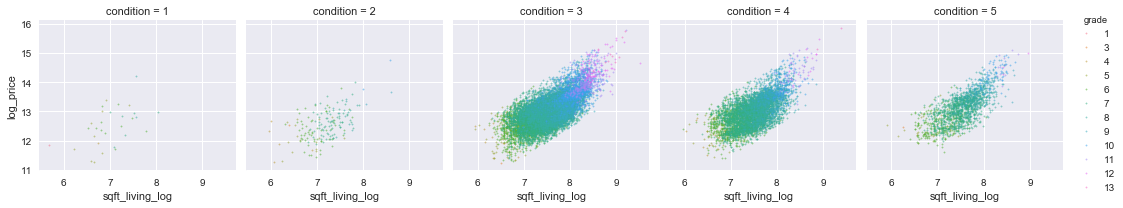

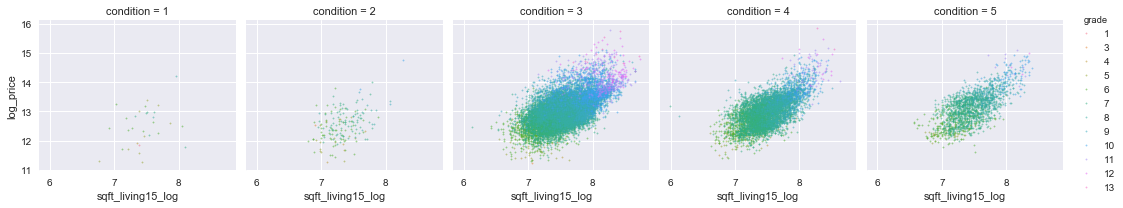

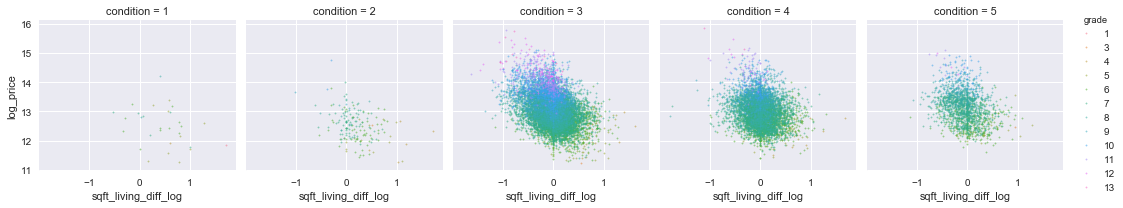

In [17]:
# Plotting 3 FacetGrid plots showing living area v. log-price separated by condition (column) and grade (hue)
# sqft_living_log v. log-price
c = sns.FacetGrid(df, col="condition", hue="grade")
c = c.map(plt.scatter, "sqft_living_log", "log_price", s=2, alpha=0.5).add_legend()
plt.show()
# sqft_living15_log v. log-price
c = sns.FacetGrid(df, col="condition", hue="grade")
c = c.map(plt.scatter, "sqft_living15_log", "log_price", s=2, alpha=0.5).add_legend()
plt.show()
# sqft_living_diff_log v. log-price
c = sns.FacetGrid(df, col="condition", hue="grade")
c = c.map(plt.scatter, "sqft_living_diff_log", "log_price", s=2, alpha=0.5).add_legend()
plt.show()

#### Figure 6 | FacetGrid Plots of House Log-Living Area (2014) v. Log-Price (top), House Log-Living Area (2015) v. Log-Price (middle), and the difference in Log-Living Area from 2014 to 2015 v. Log-Price (bottom), all distinguished by House Condition (Facet) and Grade (Hue)
Based on the findings from Figure 5, where housing grade was shown to have a strong, positive linear relationship with log-price, the condition feature (an index from 1 to 5 on the condition of the property) was also assessed for its potential connection to price. facet-grids were created for log-living area in 2014, 2015, and the change between years versus log-price, faceted by the conditon and distinguished in color by grade. 

The King County housing dataset features relatively few homes with condition scores of 1 or 2 in comparison to those with condition scores of 5 and especially 3 and 4. Looking across the condition facets, one sees fewer homes with very low log-prices as one increases score; however, one does not necessarily see more homes with very high log-prices. In fact, some of the most expensive homes are within the 3rd and 4th condition facet, rather than the 5th. This would seem to suggest that condition can be a detriment to home price, but not a major factor after a certain threshold. Grade alone still remains an excellent feature for grouping homes by log-price.

Comparing 2014 (top) and 2015 (middle) distributions, we see an overall decrease in log-living area, with little to no homes with a log-living area greater than 9 for 2015. This is likely due to a decrease in total lot size, or, less likely, a reduction home size corresponding to an increase in yard size. The difference plot (bottom) shows an overall decrease in log-living area for homes with housing grades greater than 8, yet shows an overall increase in log-living area for homes with housing grades less than 8. This peculiar difference in renovation behavior makes 'sqft_living_diff_log' a strong potential feature for regression modeling. 

### Bedrooms and Bathrooms v. Log-Price

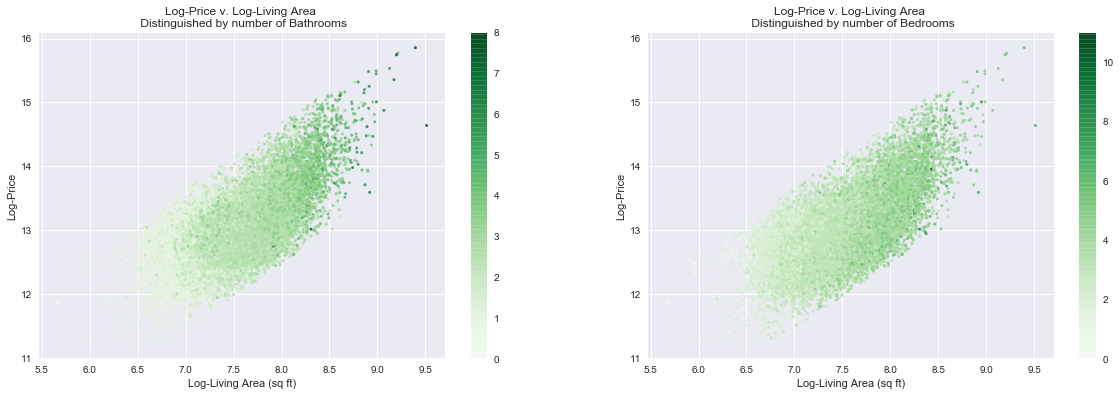

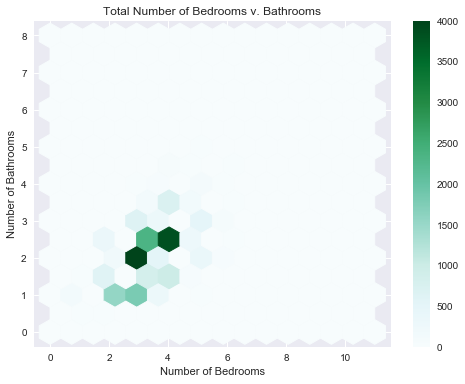

In [18]:
# Plotting Log-Price v. Log-Living Area, distinguished by number of Bathrooms (1) and Bedrooms (2)
plt.figure(figsize=(20,6))
# Bathrooms
plt.subplot(121)
plt.scatter(x = df['sqft_living_log'], y = df['log_price'], s = 7, c = df['bathrooms'], cmap='Greens', alpha=0.8)
plt.title('Log-Price v. Log-Living Area \n Distinguished by number of Bathrooms')
plt.ylabel('Log-Price')
plt.xlabel('Log-Living Area (sq ft)')
plt.colorbar()
# Bedrooms
plt.subplot(122)
plt.scatter(x = df['sqft_living_log'], y = df['log_price'], s = 7, c = df['bedrooms'], cmap='Greens', alpha=0.8)
plt.title('Log-Price v. Log-Living Area \n Distinguished by number of Bedrooms')
plt.ylabel('Log-Price')
plt.xlabel('Log-Living Area (sq ft)')
plt.colorbar()
plt.show()

# Plotting Hexbin of Number of Bedrooms v. Bathrooms
ax = plt.figure(figsize=(8, 6)).gca()
df.plot.hexbin(x = 'bedrooms', y = 'bathrooms', gridsize = 15, ax = ax)
ax.set_title('Total Number of Bedrooms v. Bathrooms')
ax.set_ylabel('Number of Bathrooms')
ax.set_xlabel('Number of Bedrooms')
plt.show()

#### Figure 7 | Scatterplots of Log-Price v. Log-Living Area distinguished by number of bedrooms (top-left) and number of bathrooms (top-right) as well as a frequency Hexbin plot of Number of Bathrooms v. Number of Bedrooms (bottom). 
Finally, the last features to be examined for their potential impact on log-price were the number of bedrooms and bathrooms within a particular home. Similar to Figure 6, log-price was plotted against log-living area, though hue was now used to distinguish by bedrooms (top-left) or bathrooms (top-right). There appears to be a moderate positive trend for both features and log-price, though the relationship is considerably less linear than that of home grade. 

A final hexbin plot (bottom) shows the frequency of homes within the dataset for particular numbers of bedrooms and bathrooms; the most frequent home attributes are 2 bathrooms with 3 bedrooms and 2.5 bathrooms with 4 bedrooms.

## Preparing Data for Regression Model

### Conversion

In [19]:
# Converting timeseries columns to int
df['date'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D') # 0 = day first house was recorded
df['yr_built'] = (df['yr_built'] - df['yr_built'].min())  / np.timedelta64(1,'Y') # 0 = year first house was built
df['yr_renovated'] = (df['yr_renovated'] - df['yr_renovated'].min())  / np.timedelta64(1,'Y') # 0 = year first house was built

df[['date', 'yr_built', 'yr_renovated']].describe()

,date,yr_built,yr_renovated
count,21612.000000,21612.000000,21612.000000
mean,180.198917,71.006004,73.387046
std,113.047367,29.374235,28.807555
min,0.000000,0.000000,0.000000
25%,81.000000,50.998994,53.999740
50%,167.000000,74.999487,77.000897
75%,291.000000,97.001307,98.999979
max,390.000000,115.000308,115.000308


### Standardization

In [20]:
# Standardizing all numeric columns that are not target(s)
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()

numeric_columns =  df.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop(['log_price', 'price']) # dropping targets from list
df[numeric_columns] = df[numeric_columns].astype(float) # converting all numeric columns to float

for i in numeric_columns:
    df[i] = standardize.fit_transform(df[i].values.reshape(-1, 1))
    
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,...,sqft_lot15,log_price,sqft_living_log,sqft_living15_log,sqft_living_diff_log,sqft_lot_log,sqft_lot15_log,date,yr_built,yr_renovated
count,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,...,2.161200e+04,21612.000000,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04,2.161200e+04
mean,5.400835e+05,5.924477e-16,-8.742261e-16,-8.724795e-17,1.202254e-16,2.900778e-14,2.943797e-16,2.451624e-15,-5.931684e-14,2.432555e-14,...,1.841716e-16,13.047802,-2.208528e-16,-5.731734e-16,3.367521e-16,-1.161779e-15,1.225540e-15,-1.382642e-17,-6.938236e-15,-3.930103e-15
std,3.671351e+05,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,0.526692,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,7.500000e+04,-3.711031e+00,-2.745892e+00,-1.948880e+00,-3.521783e-01,-9.154659e-01,-1.809528e+00,-6.586421e-01,-2.916742e+00,-2.166566e+00,...,-4.438095e-01,11.225243,-4.426641e+00,-4.734248e+00,-6.291974e+00,-3.031994e+00,-3.053349e+00,-1.594049e+00,-2.417345e+00,-2.547552e+00
25%,3.218375e+05,-4.069236e-01,-4.736348e-01,-7.114500e-01,-2.430535e-01,-9.154659e-01,-7.226701e-01,-6.586421e-01,-6.428332e-01,-8.102832e-01,...,-2.808671e-01,12.681802,-6.764582e-01,-7.112081e-01,-4.882129e-01,-5.150669e-01,-5.215127e-01,-8.775190e-01,-6.811232e-01,-6.730094e-01
50%,4.500000e+05,-4.069236e-01,1.755816e-01,-1.850114e-01,-1.807896e-01,1.049699e-02,-2.758509e-01,-6.586421e-01,8.482468e-02,-1.143894e-01,...,-1.885733e-01,13.017003,1.063168e-02,-6.697741e-02,3.846031e-02,-5.714524e-02,-2.764345e-02,-1.167583e-01,1.359550e-01,1.254509e-01
75%,6.450000e+05,6.944456e-01,5.001899e-01,5.118258e-01,-1.066897e-01,9.364599e-01,5.091018e-01,6.066925e-01,8.512742e-01,6.312111e-01,...,-9.835800e-02,13.377006,6.909198e-01,6.929965e-01,4.856169e-01,3.179559e-01,3.168648e-01,9.801524e-01,8.849900e-01,8.891253e-01
max,7.700000e+06,8.404030e+00,7.641571e+00,1.247783e+01,3.950346e+01,3.714349e+00,9.203963e+00,1.023227e+01,1.570091e+00,6.382986e+00,...,3.143962e+01,15.856731,4.621083e+00,3.647138e+00,6.116424e+00,5.903152e+00,5.801210e+00,1.855912e+00,1.497752e+00,1.444559e+00


### One-Hot Encoding Categories

In [21]:
# One-hot encoding all categorical columns
df = df.drop(['id'], axis=1) # dropping 'id' column, as it has little value numerically or categorically

df = pd.get_dummies(df) # pandas.get_dummies automatically converts only cateogory/object datatype columns

df.select_dtypes(include='uint8').head()

,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Initial Regression Model

In [22]:
# Creating train and test dataframes, split 80:20
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f'df_test: {df_test.shape}') 
print(f'df_train: {df_train.shape}')

df_test: (4323, 115)
df_train: (17289, 115)


In [23]:
# Organizing one-hot encoded columns into original feature categories
waterfront = list(df.columns[21:23])
views = list(df.columns[23:28])
conditions = list(df.columns[28:33])
grades = list(df.columns[33:45])
zipcodes = list(df.columns[45:115])

# creating category strings for ols_formula, dropping final redundant column
waterfront_ols = ' + '.join(waterfront[:-1])
print(f'Waterfront formula string: {waterfront_ols}\n')
views_ols = ' + '.join(views[:-1])
print(f'Views formula string: {views_ols}\n')
conditions_ols = ' + '.join(conditions[:-1])
print(f'Conditions formula string: {conditions_ols}\n')
grades_ols = ' + '.join(grades[:-1])
print(f'Grades formula string: {grades_ols}\n')
zipcodes_ols = ' + '.join(zipcodes[:-1])
print(f'Zipcodes formula string: {zipcodes_ols}\n')

Waterfront formula string: waterfront_0

Views formula string: view_0 + view_1 + view_2 + view_3

Conditions formula string: condition_1 + condition_2 + condition_3 + condition_4

Grades formula string: grade_1 + grade_3 + grade_4 + grade_5 + grade_6 + grade_7 + grade_8 + grade_9 + grade_10 + grade_11 + grade_12

Zipcodes formula string: zipcode_98001 + zipcode_98002 + zipcode_98003 + zipcode_98004 + zipcode_98005 + zipcode_98006 + zipcode_98007 + zipcode_98008 + zipcode_98010 + zipcode_98011 + zipcode_98014 + zipcode_98019 + zipcode_98022 + zipcode_98023 + zipcode_98024 + zipcode_98027 + zipcode_98028 + zipcode_98029 + zipcode_98030 + zipcode_98031 + zipcode_98032 + zipcode_98033 + zipcode_98034 + zipcode_98038 + zipcode_98039 + zipcode_98040 + zipcode_98042 + zipcode_98045 + zipcode_98052 + zipcode_98053 + zipcode_98055 + zipcode_98056 + zipcode_98058 + zipcode_98059 + zipcode_98065 + zipcode_98070 + zipcode_98072 + zipcode_98074 + zipcode_98075 + zipcode_98077 + zipcode_98092 + zipc

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1301.
Date:                Thu, 16 Aug 2018   Prob (F-statistic):               0.00
Time:                        00:21:16   Log-Likelihood:                 4470.5
No. Observations:               17289   AIC:                            -8757.
Df Residuals:                   17197   BIC:                            -8043.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               14.9207 

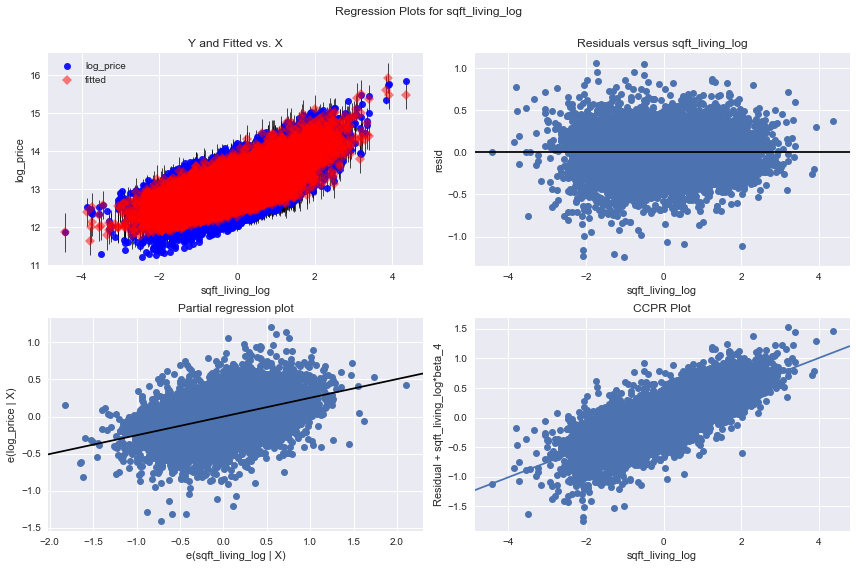

In [24]:
# Creating initial Regression Model based on key features from prior analysis
formula = 'log_price ~ bedrooms + bathrooms + floors + sqft_living_log + sqft_living_diff_log + yr_renovated'
formula = ' + '.join([formula, waterfront_ols, views_ols, grades_ols, zipcodes_ols])

ols_model = sm.ols(formula = formula, data=df_train)
results = ols_model.fit()
print(results.summary())

# plotting regression plots for sqft_liviing_log
fig = plt.figure(figsize=(12,8))
statsmodels.graphics.plot_regress_exog(results, "sqft_living_log", fig=fig)
plt.show()

#### Figure 8 | OLS Initial Regression Results and Partial Regression Plots for Log-Price v. Log-Living Area
After testing various combinations of features, the above model was chosen for its high coefficient of determination and low AIC score. The model relies on features such as number of bedrooms, number of bathrooms, number of floors, log-living area (2014), the difference in log-living area between 2014 and 2015, year renovated (or simply built), zipcode, housing grade, market views, and whether the propery is on the waterfront. Other factors, such as condition, log-lot area, latitude, or longitude, were discarded due to both limited model improvement when added as well as the potential for collinearity (as in the case with latitude & longitude v. zipcode or sqft_living_diff_log v. log-lot area). Above all, the greatest contributor to model accuracy were the zipcode one-hot encoded features, which, as demonstrated in Figure 3, segregated low-income from upper-middle to upper-income housing within certain affluent zipcodes, such as Medina or Mercer Island.

Below the regression summary are the partial regression plots for log-price v. log-living area. The plot in the top left corner visually demonstrates the high degree to which fitted predicted values matched their actual counterparts. Many points on either extrema appear to be reasonably fitted, yet homes within the low to middle range (either in terms of log-living area of log-price) seem to be underestimated, with fitted values more closely following any potential line of best fit than their actual counterparts. 

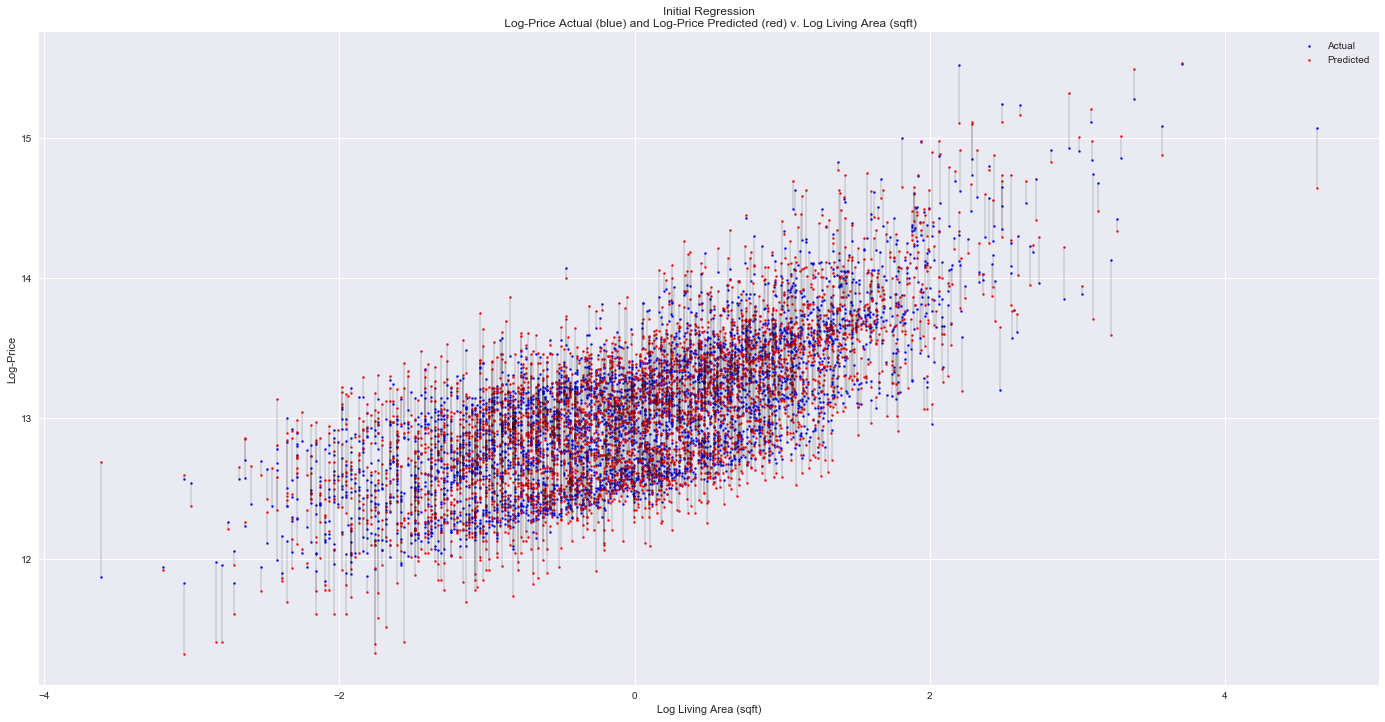

---Initial Regression: Results for Test Set---
RMSE:0.4346774853899921
SSR:154.39845634811638
SST:1235.8992339168892
RSQ:0.875071970180945


In [25]:
# Predicting log_price using df_test data
y_test = df_test['log_price'].values
y_pred = results.predict(df_test).values

# Plotting Sqft_living_log against Predicted and Actual log_price for df_test
X_sqftliving = df_test['sqft_living_log'].values

def PartRegress_PredictvActual_Plot(X, predicted, actual, name="", xlabel="X feature"):
    """Plots Partial Regression for X feature against Log-Price predicted and actual values"""
    plt.figure(figsize=(24,12))
    plt.scatter(X, predicted, color='b', s=4)
    plt.scatter(X, actual, color='r', s=4)
    plt.legend(['Actual', 'Predicted'])
    for i in range(len(X)): # visually connecting predicted and actual values that share X feature
        plt.plot([X[i], X[i]], [y_test[i], y_pred[i]], c="k", linewidth=0.2)
    plt.title(f'{name} Regression\n Log-Price Actual (blue) and Log-Price Predicted (red) v. {xlabel}')
    plt.ylabel('Log-Price')
    plt.xlabel(f'{xlabel}')
    plt.show()
    
PartRegress_PredictvActual_Plot(X_sqftliving, y_pred, y_test, name="Initial", xlabel="Log Living Area (sqft)")    
    
# Obtaining RMSE, SSR, SST, & test RSQ for initial regression
print('---Initial Regression: Results for Test Set---')
RMSE_initial = np.sqrt(np.std(y_test - y_pred))
print(f'RMSE:{RMSE_initial}')
residuals = y_pred - y_test
SSR_initial = np.sum(np.square(residuals))
print(f'SSR:{SSR_initial}')
SST_initial = np.sum(np.square(y_test - np.mean(y_test)))
print(f'SST:{SST_initial}')
RSQ_initial = 1 - (SSR_initial / SST_initial)
print(f'RSQ:{RSQ_initial}')

#### Figure 9 | Partial Regression Plot of Log-Price v. Log Living Area for Initial Regression Model
Using the test dataframe, the initial regression model was fitted to the final 20 percent of the housing dataset, left for model testing purposes. Given the high number of features incorporated into the model, especially when one factors in the one-hot-encoded categorical features, there was a distinct possibility that the model would overfit the training data. However, this does not appear to be case, given the very low RMSE, high coefficient of determination (better than the model's performance on the training set), and generally low difference between fitted v. actual value pairs within the partial regression plot. Despite the model's excellent overall performance, there are some fitted-actual value pairs that vary considerably from one another, though there doesn't appear to be a general region where this discrepancy is most apparent. 

### Regularized Regression Model

In [26]:
def regress_regularize(formula, df_train, df_test, log_lambda_seq, L1_wt_seq):
    
    """ Fits a series regularized regression models for given values of log-lambda and L1 weight,
        using an ols formula and test and training dataframes. 
        
        Returns a dataframe of training and test summary statistics in addition to a
        dataframe of model parameters."""
    
    lambda_seq = np.exp(log_lambda_seq)
    count = 1
    trial_summary_data = []
    trial_parameter_data = []
    for L1_wt in L1_wt_seq:
        for lamb in lambda_seq:
            print(f'Running Trial #{count} with lambda={lamb} and L1_wt={L1_wt}')
            count += 1
            regular_model = sm.ols(formula, data=df_train).fit_regularized(method='elastic_net', alpha=lamb, L1_wt=L1_wt)
            coeff = list(regular_model.params)
            betacoeff = coeff[1:]
            
            y_train_pred = regular_model.fittedvalues
            y_train = df_train['log_price'].values
            resid_train = y_train_pred - y_train
            RMSE_train = np.sqrt(np.std(y_train - y_train_pred))
            SSR_train = np.sum(np.square(resid_train))
            SST_train = np.sum(np.square(y_train - np.mean(y_train)))
            RSQ_train = 1 - (SSR_train / SST_train)
        
            y_test_pred = regular_model.predict(df_test).values
            y_test = df_test['log_price'].values
            RMSE_test = np.sqrt(np.std(y_test - y_test_pred))
            resid_test = y_test_pred - y_test
            SSR_test = np.sum(np.square(resid_test))
            SST_test = np.sum(np.square(y_test - np.mean(y_test)))
            RSQ_test = 1 - (SSR_test / SST_test)
            
            trial_summary_data.append([lamb, L1_wt, RMSE_train, SSR_train, SST_train, RSQ_train,
                                                    RMSE_test, SSR_test, SST_test, RSQ_test])
            trial_parameter_data.append([betacoeff, y_train_pred, y_test_pred])
    
    regularize_summary_df = pd.DataFrame(trial_summary_data, columns=['Lambda', 'L1_wt', 
                                                                      'RMSE_train', 'SSR_train', 'SST_train', 'RSQ_train',
                                                                      'RMSE_test', 'SSR_test', 'SST_test', 'RSQ_test'])
    regularize_params_df = pd.DataFrame(trial_parameter_data, columns=['Betacoeffs', 'y_train_pred', 'y_test_pred'])
    
    return regularize_summary_df, regularize_params_df

In [27]:
# Determining best L1 weight for regularized regression
regularize_summary_df, regularize_params_df = regress_regularize(formula, df_train, df_test,
                                                                 log_lambda_seq=[-10], #constant
                                                                 L1_wt_seq=np.linspace(0, 1, 11)) #increasing by 0.1

regularize_summary_df

Running Trial #1 with lambda=4.5399929762484854e-05 and L1_wt=0.0
Running Trial #2 with lambda=4.5399929762484854e-05 and L1_wt=0.1
Running Trial #3 with lambda=4.5399929762484854e-05 and L1_wt=0.2
Running Trial #4 with lambda=4.5399929762484854e-05 and L1_wt=0.30000000000000004
Running Trial #5 with lambda=4.5399929762484854e-05 and L1_wt=0.4
Running Trial #6 with lambda=4.5399929762484854e-05 and L1_wt=0.5
Running Trial #7 with lambda=4.5399929762484854e-05 and L1_wt=0.6000000000000001
Running Trial #8 with lambda=4.5399929762484854e-05 and L1_wt=0.7000000000000001
Running Trial #9 with lambda=4.5399929762484854e-05 and L1_wt=0.8
Running Trial #10 with lambda=4.5399929762484854e-05 and L1_wt=0.9
Running Trial #11 with lambda=4.5399929762484854e-05 and L1_wt=1.0


,Lambda,L1_wt,RMSE_train,SSR_train,SST_train,RSQ_train,RMSE_test,SSR_test,SST_test,RSQ_test
0,0.000045,0.0,0.434466,616.025596,4758.930132,0.870554,0.437417,158.363051,1235.899234,0.871864
1,0.000045,0.1,0.442313,661.762132,4758.930132,0.860943,0.446006,171.230156,1235.899234,0.861453
2,0.000045,0.2,0.441847,659.002369,4758.930132,0.861523,0.445546,170.540643,1235.899234,0.862011
3,0.000045,0.3,0.442372,662.103515,4758.930132,0.860871,0.446355,171.735505,1235.899234,0.861044
4,0.000045,0.4,0.442329,661.851860,4758.930132,0.860924,0.446204,171.520332,1235.899234,0.861218
5,0.000045,0.5,0.442544,663.134326,4758.930132,0.860655,0.446748,172.349149,1235.899234,0.860548
6,0.000045,0.6,0.442498,662.863680,4758.930132,0.860712,0.446688,172.258530,1235.899234,0.860621
7,0.000045,0.7,0.442454,662.596314,4758.930132,0.860768,0.446631,172.170795,1235.899234,0.860692
8,0.000045,0.8,0.442410,662.332269,4758.930132,0.860823,0.446576,172.085612,1235.899234,0.860761
9,0.000045,0.9,0.442366,662.072383,4758.930132,0.860878,0.446521,172.001957,1235.899234,0.860828


In [28]:
# Determining best log-lambda for regularized regression
regularize_summary_df, regularize_params_df = regress_regularize(formula, df_train, df_test,
                                                                 log_lambda_seq=np.linspace(-20, -10.1, 100), #increasing by 0.1
                                                                 L1_wt_seq=[0]) #constant
regularize_summary_df

Running Trial #1 with lambda=2.061153622438558e-09 and L1_wt=0
Running Trial #2 with lambda=2.277927041205371e-09 and L1_wt=0
Running Trial #3 with lambda=2.517498719438278e-09 and L1_wt=0
Running Trial #4 with lambda=2.782266371015873e-09 and L1_wt=0
Running Trial #5 with lambda=3.074879879586606e-09 and L1_wt=0
Running Trial #6 with lambda=3.398267819495071e-09 and L1_wt=0
Running Trial #7 with lambda=3.7556667659383025e-09 and L1_wt=0
Running Trial #8 with lambda=4.1506536876982236e-09 and L1_wt=0
Running Trial #9 with lambda=4.587181746647525e-09 and L1_wt=0
Running Trial #10 with lambda=5.069619862322287e-09 and L1_wt=0
Running Trial #11 with lambda=5.602796437537268e-09 and L1_wt=0
Running Trial #12 with lambda=6.1920476826640385e-09 and L1_wt=0
Running Trial #13 with lambda=6.843271022217988e-09 and L1_wt=0
Running Trial #14 with lambda=7.56298411826514e-09 and L1_wt=0
Running Trial #15 with lambda=8.358390101374608e-09 and L1_wt=0
Running Trial #16 with lambda=9.237449661970594

,Lambda,L1_wt,RMSE_train,SSR_train,SST_train,RSQ_train,RMSE_test,SSR_test,SST_test,RSQ_test
0,2.061154e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398453,1235.899234,0.875072
1,2.277927e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398453,1235.899234,0.875072
2,2.517499e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398452,1235.899234,0.875072
3,2.782266e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398452,1235.899234,0.875072
4,3.074880e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398451,1235.899234,0.875072
5,3.398268e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398451,1235.899234,0.875072
6,3.755667e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398450,1235.899234,0.875072
7,4.150654e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398450,1235.899234,0.875072
8,4.587182e-09,0,0.432248,603.532031,4758.930132,0.873179,0.434677,154.398449,1235.899234,0.875072
9,5.069620e-09,0,0.432248,603.532032,4758.930132,0.873179,0.434677,154.398448,1235.899234,0.875072


Best Model log-lambda: -15.9
Best Model L1_wt: 0.0


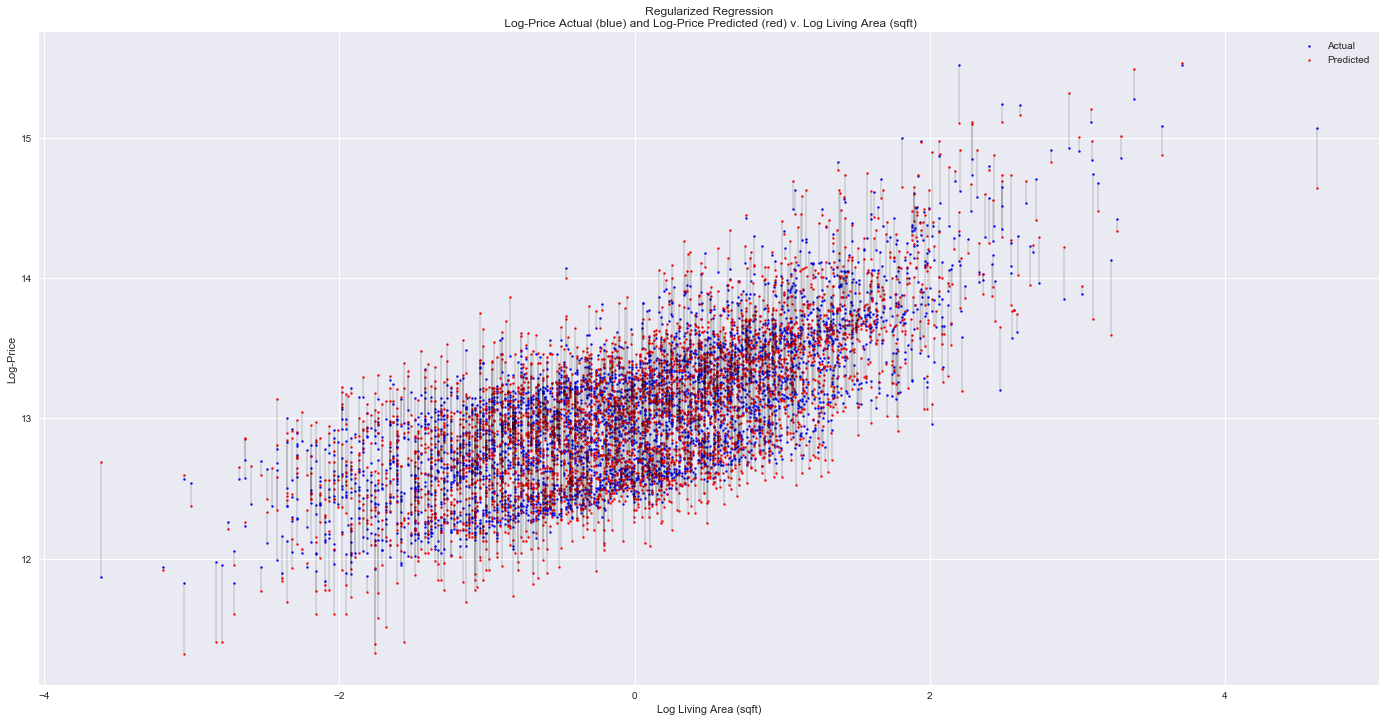

---Regularized Regression: Results for Test Set---
RMSE:0.4346773307685765 | Initial: 0.4346774853899921
SSR:154.39835466856036 | Initial: 154.39845634811638
SST:1235.8992339168892 | Initial: 1235.8992339168892
RSQ:0.8750720524526652 | Initial: 0.875071970180945


In [29]:
# Obtaining information on best-fit regularized regression model
best_regularize_model = regularize_summary_df.loc[regularize_summary_df['RSQ_test'].idxmax(), :]

brm_params = regularize_params_df.loc[regularize_summary_df['RSQ_test'].idxmax(), :]
brm_y_test_pred = brm_params['y_test_pred']

brm_loglambda = round(np.log(best_regularize_model['Lambda']), 3)
print(f'Best Model log-lambda: {brm_loglambda}')
print(f'Best Model L1_wt: {best_regularize_model.L1_wt}')

# Plotting Log-Price predicted and actual v. Log Living Area (sqft) for regularized regression model
PartRegress_PredictvActual_Plot(X_sqftliving, brm_y_test_pred, y_test, name="Regularized", xlabel="Log Living Area (sqft)") 

# Obtaining test RMSE, SSR, SST, & RSQ for regularized regression
print('---Regularized Regression: Results for Test Set---')
print(f'RMSE:{best_regularize_model.RMSE_test} | Initial: {RMSE_initial}')
print(f'SSR:{best_regularize_model.SSR_test} | Initial: {SSR_initial}')
print(f'SST:{best_regularize_model.SST_test} | Initial: {SST_initial}')
print(f'RSQ:{best_regularize_model.RSQ_test} | Initial: {RSQ_initial}')

#### Figure 10 | Partial Regression Plot of Log-Price v. Log Living Area for Regularized Regression Model


To improve the performance of the initial regression model on the test dataset, regularization was applied. Ten L1 weight values between 0 and 1 were tested, with a pure ridge regularization (L1_wt = 0) shown to be noticeably better than other L1 weight values. Following this, log-lambda values were tested over a wide range initially, though this was narrowed to 100 values between -20 and -10.1; a log-lambda value of -15.9 was shown to produce the best model when it came to performance on the test dataset.

As with the initial regression model and Figure 9, a partial regression plot of log-price v. log living area was created for the final regularized regression model. In comparison to the initial model, the updated model performed just slightly better when it came to fitting the test dataset, as shown by the slightly reduced RMSE and slightly increased coefficent of determination. Other model improving methods, such as principal component regression and singular value decomposition, were both conducted in addition to regularization; However, neither method resulted in better performance than the initial model.

Given the excellent quality of data within the King County housing dataset, future improvments to model would begin first with a  reassessment of model features, especially those where further feature engineering is possible.